In [2]:
import pandas as pd
import gzip
import nltk
import string
import random

import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    data = list(parse(path))
    df = pd.json_normalize(data, 'questions', ['asin'])
    return df

# Replace 'QA_Beauty.json.gz' with the actual path to your Gzip-compressed JSON file
df = getDF('QA_Beauty.json.gz')

# Display the DataFrame
df

,questionType,askerID,questionTime,questionText,answers,asin
0,open-ended,A3VTSR929E3J0R,"December 26, 2013",May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,B000050FES
1,open-ended,A1LZ5DJ7AJYAXD,"April 26, 2014",Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,B000050FES
2,yes/no,A1ER8W5FAQM6G5,"July 11, 2014","How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,B000050FES
3,open-ended,A1P403R4I7LVPU,"December 20, 2013",How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,B000052YQ2
4,open-ended,A166KM8A5H1Z2O,"February 26, 2014",I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,B000052YQ2
...,...,...,...,...,...,...
32931,yes/no,A164SPHD6JR4L0,"July 2, 2014",is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...,B00L5JHZJO
32932,yes/no,A3LMNODD16O8J6,"July 2, 2014",I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ...",B00L5JHZJO
32933,yes/no,A13S7ZT69W96HR,"July 2, 2014",is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...,B00L5JHZJO
32934,open-ended,A1HHOCBWVDXSE,"July 2, 2014",how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...,B00L5JHZJO


In [3]:
#Distribution of question type
df['questionType'].value_counts()

open-ended    28380
yes/no         4556
Name: questionType, dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32936 entries, 0 to 32935
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   questionType  32936 non-null  object
 1   askerID       32936 non-null  object
 2   questionTime  32936 non-null  object
 3   questionText  32936 non-null  object
 4   answers       32936 non-null  object
 5   asin          32936 non-null  object
dtypes: object(6)
memory usage: 1.5+ MB


In [5]:
df.isnull().value_counts()

questionType  askerID  questionTime  questionText  answers  asin 
False         False    False         False         False    False    32936
dtype: int64

univariate analysis

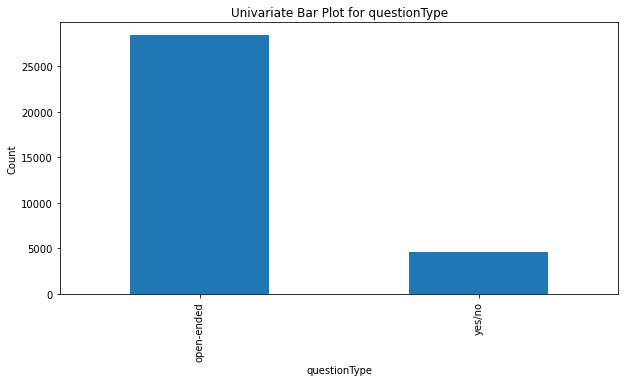

In [6]:
import matplotlib.pyplot as plt

def univariate_bar_plot(data, column):
    """
    Create a univariate bar graph for a specific column in the DataFrame.

    Parameters:
    - data: DataFrame
    - column: str, the column for which to create the bar graph
    """
    plt.figure(figsize=(10, 5))
    data[column].value_counts().plot(kind='bar')
    plt.title(f'Univariate Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

# Example usage:
# Assuming 'questionType' is a column in your DataFrame 'df'
univariate_bar_plot(df, 'questionType')

In [7]:
data = df.copy()
data
# askerID,questionTime, asin

,questionType,askerID,questionTime,questionText,answers,asin
0,open-ended,A3VTSR929E3J0R,"December 26, 2013",May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,B000050FES
1,open-ended,A1LZ5DJ7AJYAXD,"April 26, 2014",Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,B000050FES
2,yes/no,A1ER8W5FAQM6G5,"July 11, 2014","How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,B000050FES
3,open-ended,A1P403R4I7LVPU,"December 20, 2013",How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,B000052YQ2
4,open-ended,A166KM8A5H1Z2O,"February 26, 2014",I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,B000052YQ2
...,...,...,...,...,...,...
32931,yes/no,A164SPHD6JR4L0,"July 2, 2014",is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...,B00L5JHZJO
32932,yes/no,A3LMNODD16O8J6,"July 2, 2014",I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ...",B00L5JHZJO
32933,yes/no,A13S7ZT69W96HR,"July 2, 2014",is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...,B00L5JHZJO
32934,open-ended,A1HHOCBWVDXSE,"July 2, 2014",how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...,B00L5JHZJO


In [8]:
new_df= data[['questionType', 'questionText', "answers"]]
new_df['answer'] = data['answers'].apply(lambda answers: [answer.get('answerText', '') for answer in answers])
new_df

<ipython-input-8-d29c30daeae6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['answer'] = data['answers'].apply(lambda answers: [answer.get('answerText', '') for answer in answers])


,questionType,questionText,answers,answer
0,open-ended,May I request for a manual instruction on this...,[{'answerText': 'Homedics has a complete list ...,[Homedics has a complete list of instruction m...
1,open-ended,Having problems with the heater melting the wa...,[{'answerText': 'I leave the unit on all the t...,[I leave the unit on all the time so it is alw...
2,yes/no,"How much wax (in pounds, for instance) does it...",[{'answerText': 'It came with the proper amoun...,"[It came with the proper amount of wax, but th..."
3,open-ended,How to know the expired date of this product?,[{'answerText': 'The expiration date is on the...,[The expiration date is on the bottom of the p...
4,open-ended,I am not in the sun as I work inside. I am new...,[{'answerText': 'This product is awesome. I do...,[This product is awesome. I dont spend a lot o...
...,...,...,...,...
32931,yes/no,is Argan Oil Pure 100% good for Skin?,[{'answerText': 'I really like it. It is a no...,[I really like it. It is a non greasy moistur...
32932,yes/no,I find myself with rough cuticles right around...,"[{'answerText': 'Yes, you can. In the evening ...","[Yes, you can. In the evening before you go to..."
32933,yes/no,is it good for nail beauty?,[{'answerText': 'I would say it's good for cut...,[I would say it's good for cuticles. I can't ...
32934,open-ended,how can i use it for Topical Use on Dry Hair?,[{'answerText': 'A little goes a long way! A ...,"[A little goes a long way! A drop or two, dep..."


In [9]:
import re

# Define a function to filter out non-English text
def filter_english(text):
    # Regular expression to match English words
    english_pattern = re.compile(r'^[a-zA-Z\s]+$')
    return [answer for answer in text if english_pattern.match(answer)]

# Apply the function to filter non-English text from the answer column
new_df['answer'] = new_df['answers'].apply(lambda answers: filter_english([answer.get('answerText', '') for answer in answers]))

# Remove rows where there are no English answers
new_df = new_df[new_df['answer'].apply(len) > 0]

# Reset index
new_df.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
new_df

<ipython-input-9-b3c5ed8b4093>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['answer'] = new_df['answers'].apply(lambda answers: filter_english([answer.get('answerText', '') for answer in answers]))


,questionType,questionText,answers,answer
0,open-ended,Can I wear this to bed?,"[{'answerText': 'Yes', 'answererID': 'A2BCK8PC...","[Yes, No, Yes, Yes]"
1,open-ended,Amazon product title says 'broad specturm'. Ho...,[{'answerText': 'I think so. The one for sensi...,[Yes]
2,open-ended,How Is the product shiped? Is it secretive?,"[{'answerText': 'Yes, as I recall, it was in a...",[Yes]
3,open-ended,is it disposable or washable,"[{'answerText': 'Disposable', 'answererID': 'A...","[Disposable, Disposable]"
4,open-ended,Is the color of this cream white or beige?,"[{'answerText': 'Very light beige I guess', 'a...","[Very light beige I guess, White, White, white]"
...,...,...,...,...
8997,yes/no,is ti for kids,[{'answerText': 'i dont know if it is for kids...,[Adults]
8998,open-ended,Hi Can this wig fit a 7 year old girl?,"[{'answerText': 'Yes perfect', 'answererID': '...",[Yes perfect]
8999,open-ended,"By registering, ""The codes on your product wer...",[{'answerText': 'Even i am trying to register ...,[Even i am trying to register my product and g...
9000,yes/no,can this item be registered with GHD for the w...,"[{'answerText': 'Yes, I recently purchased it ...",[Yes]


In [10]:
# new_df1 = new_df[['questionType', 'questionText', "answers"]]
# new_df1['answer'] = new_df['answers'].apply(lambda answers: [answer.get('answerText', '') for answer in answers])
# new_df1

In [12]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')



# Tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text)
    # Remove stopwords and punctuation
    stop_words = set(stopwords.words('english'))
    tokens = [token.lower() for token in tokens if token.isalnum() and token.lower() not in stop_words]
    return tokens

# Convert dictionaries in 'answers' column to strings
# new_df['answers'] = new_df['answers'].apply(lambda answers: [answer.get('answerText', '') for answer in answers])

# Tokenize "questionText" and "answers" columns
new_df['tokenized_question'] = new_df['questionText'].apply(tokenize_text)
new_df['tokenized_answers'] = new_df['answer'].apply(lambda answers: [tokenize_text(answer) for answer in answers])


# Display the resulting DataFrame
print(new_df[['tokenized_question', 'tokenized_answers']])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-12-e6f3b83a848f>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tokenized_question'] = new_df['questionText'].apply(tokenize_text)


                                     tokenized_question  \
0                                           [wear, bed]   
1     [amazon, product, title, says, specturm, howev...   
2                          [product, shiped, secretive]   
3                                [disposable, washable]   
4                          [color, cream, white, beige]   
...                                                 ...   
8997                                         [ti, kids]   
8998                 [hi, wig, fit, 7, year, old, girl]   
8999    [registering, codes, product, recognised, fake]   
9000                  [item, registered, ghd, warranty]   
9001                [argan, oil, pure, 100, good, skin]   

                                      tokenized_answers  
0                             [[yes], [], [yes], [yes]]  
1                                               [[yes]]  
2                                               [[yes]]  
3                          [[disposable], [disposable]]  
4

<ipython-input-12-e6f3b83a848f>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tokenized_answers'] = new_df['answer'].apply(lambda answers: [tokenize_text(answer) for answer in answers])


In [13]:
from scipy import sparse
import string
import nltk
import random
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Download NLTK resources
nltk.download('wordnet')

# Initialize WordNet lemmatizer
lemmer = nltk.stem.WordNetLemmatizer()

# Lemmatization function
def lemmatize_text(tokens):
    lemmatized_tokens = [lemmer.lemmatize(token) for token in tokens]
    return lemmatized_tokens

# Lemmatize the tokenized text
new_df1['lemmatized_question'] = new_df1['tokenized_question'].apply(lemmatize_text)
new_df1['lemmatized_answers'] = new_df1['tokenized_answers'].apply(lambda answers: [lemmatize_text(answer) for answer in answers])

# Convert the lemmatized texts back to strings
new_df1['preprocessed_question'] = new_df1['lemmatized_question'].apply(lambda tokens: ' '.join(tokens))
new_df1['preprocessed_answers'] = new_df1['lemmatized_answers'].apply(lambda answers: [' '.join(answer) for answer in answers])

# Initialize CountVectorizer
count_vectorizer = CountVectorizer()

# Fit CountVectorizer on preprocessed question and answer texts
X_question_bow = count_vectorizer.fit_transform(new_df1['preprocessed_question'])
X_answers_bow = count_vectorizer.transform([' '.join(answers) for answers in new_df['preprocessed_answers']])

# Concatenate bag of words representations of questions and answers
# X_combined = sparse.hstack([X_question_bow])

# Define target variable
y = new_df1['answer']  # Corrected target variable name
X= 
# Print unique labels in y
print("Unique labels in y:", np.unique(y))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes of training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)





SyntaxError: invalid syntax (<ipython-input-13-c67dc33d37e0>, line 43)